In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
mnist=tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

train_labels=tf.one_hot(train_labels,depth=10).numpy()
test_labels=tf.one_hot(test_labels,depth=10).numpy()

train_images=train_images/255.0
test_images=test_images/255.0

In [10]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=64,kernel_initializer='normal',activation='relu'))
model.add(tf.keras.layers.Dense(units=32,kernel_initializer='normal',activation='relu'))
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))
''' or setup the model at a single time:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64,kernel_initializer='normal',activation=tf.nn.relu),
    tf.keras.layers.Dense(32,kernel_initializer='normal',activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])
'''
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [11]:
train_epochs=5
batch_size=50
model_history=model.fit(train_images,train_labels,validation_split=0.2,epochs=train_epochs,batch_size=batch_size,verbose=2)

Epoch 1/5
960/960 - 1s - loss: 0.3887 - accuracy: 0.8890 - val_loss: 0.2254 - val_accuracy: 0.9324 - 1s/epoch - 2ms/step
Epoch 2/5
960/960 - 1s - loss: 0.1823 - accuracy: 0.9457 - val_loss: 0.1614 - val_accuracy: 0.9526 - 1s/epoch - 1ms/step
Epoch 3/5
960/960 - 1s - loss: 0.1340 - accuracy: 0.9611 - val_loss: 0.1362 - val_accuracy: 0.9576 - 1s/epoch - 1ms/step
Epoch 4/5
960/960 - 1s - loss: 0.1060 - accuracy: 0.9679 - val_loss: 0.1281 - val_accuracy: 0.9624 - 1s/epoch - 1ms/step
Epoch 5/5
960/960 - 1s - loss: 0.0874 - accuracy: 0.9737 - val_loss: 0.1110 - val_accuracy: 0.9663 - 1s/epoch - 1ms/step


In [12]:
model_history.history

{'loss': [0.3886745870113373,
  0.1822902262210846,
  0.13400337100028992,
  0.1059844121336937,
  0.08741495758295059],
 'accuracy': [0.8889999985694885,
  0.9457291960716248,
  0.961104154586792,
  0.9678541421890259,
  0.9737499952316284],
 'val_loss': [0.22542224824428558,
  0.16140048205852509,
  0.1361899971961975,
  0.12807518243789673,
  0.11100655049085617],
 'val_accuracy': [0.9324166774749756,
  0.9525833129882812,
  0.9575833082199097,
  0.9624166488647461,
  0.9662500023841858]}

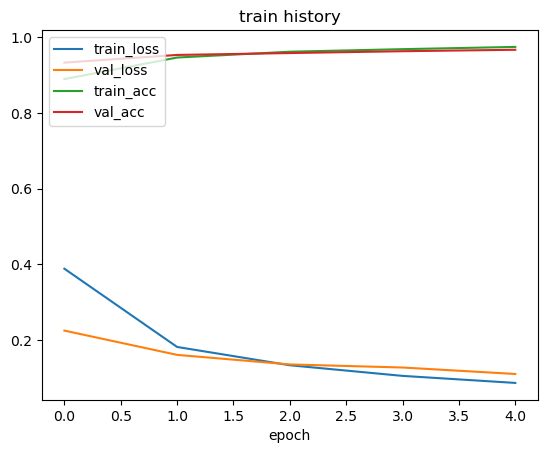

In [13]:
def show_train_history(model_history,train_loss,val_loss,train_acc,val_acc):
    plt.plot(model_history.history[train_loss])
    plt.plot(model_history.history[val_loss])
    plt.plot(model_history.history[train_acc])
    plt.plot(model_history.history[val_acc])
    plt.title('train history')
    plt.xlabel('epoch')
    plt.legend(['train_loss','val_loss','train_acc','val_acc'],loc='upper left')
    plt.show()

show_train_history(model_history,'loss','val_loss','accuracy','val_accuracy')

In [14]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
test_pred=model.predict(test_images)
test_pred.shape

313/313 - 0s - loss: 0.1060 - accuracy: 0.9674 - 318ms/epoch - 1ms/step
313/313 [==============================] - 0s 650us/step


(10000, 10)